# SGD implementation of Linear regression

In [1]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

# Data Preprocessing:

In [2]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

In [3]:
# data overview
boston_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [4]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [5]:
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,1.358915,-0.475914,0.996086,-0.287348,0.238256,-0.753693,-0.447348,-0.441469,1.715968,1.563073,0.818711,0.425857,0.250146,20.1
1,-0.231844,-0.475914,1.541848,-0.287348,0.627695,-1.705269,1.105565,-1.108027,-0.607876,0.196846,1.278092,0.425857,2.914138,14.4
2,0.863964,-0.475914,0.996086,-0.287348,1.415423,0.638021,0.893967,-0.599213,1.715968,1.563073,0.818711,-4.059632,0.785656,14.9


In [6]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [7]:
# shape of test and train data matxis
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


# SGD on Linear Regression : SKLearn Implementation

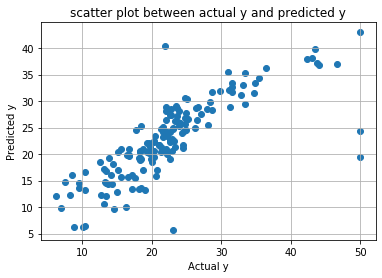

Mean Squared Error : 26.19900020505586
Mean Absolute Error : 3.3179483710335593


In [8]:
# SkLearn SGD
sgd= SGDRegressor()
sgd.fit(x_train, y_train)
plt.scatter(y_test,sgd.predict(x_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, sgd.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, sgd.predict(x_test)))

In [9]:
# SkLearn SGD predicted weight matrix
sklearn_w=sgd.coef_
sklearn_w

array([-0.67743937,  0.52364885, -0.1021781 ,  0.7705324 , -1.53773943,
        3.9509375 , -0.31123284, -2.5879464 ,  1.52518363, -1.18482428,
       -2.01280762,  1.02158794, -2.88343444])

In [10]:
r2_score(y_test,sgd.predict(x_test))

0.645000028451757